In [258]:
# import boto3
# import sagemaker
# from sagemaker import get_execution_role
# import sys
# import IPython

# if int(sagemaker.__version__.split('.')[0]) == 2:
#     print("Installing previous SageMaker Version and restarting the kernel")
#     !{sys.executable} -m pip install sagemaker==1.72.0
#     IPython.Application.instance().kernel.do_shutdown(True)

# else:
#     print("Version is good")


# role = get_execution_role()
# sess = sagemaker.Session()
# region = boto3.session.Session().region_name
# print("Region = {}".format(region))
# sm = boto3.Session().client('sagemaker')

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [2]:
# bucket = 's3://finalproject1b/Ecommerce.csv'
# path1 = 's3://finalproject1b/Ecommerce.csv'

# df = pd.read_csv(path1, encoding= 'unicode_escape')

df = pd.read_csv('Ecommerce.csv', encoding= 'unicode_escape')

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Unnamed: 8'],
      dtype='object')

In [4]:
print("The original dataset has", len(df), "observations and", len(df.columns), "variables. \n")
print("Name of all the variables:")
print(df.columns, '\n')

print(df.head())
print('#',50*"-")

The original dataset has 541909 observations and 9 variables. 

Name of all the variables:
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Unnamed: 8'],
      dtype='object') 

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

  InvoiceDate  UnitPrice  CustomerID         Country  Unnamed: 8  
0   29-Nov-16       2.55     17850.0  United Kingdom         NaN  
1   29-Nov-16       3.39     17850.0  United Kingdom         NaN  
2   29-Nov-16       2.75     17850.0  United Kingdom         NaN  
3   29-Nov-16       3.39     17850.0  United King

In [5]:
#%%
print("Datatype of all the variables:")
df.info()
print('#',50*"-")

Datatype of all the variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Unnamed: 8   0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB
# --------------------------------------------------


In [6]:
#%%
print("Summary of the dataset:")
print(df.describe())
print('#',50*"-")

Summary of the dataset:
            Quantity      UnitPrice     CustomerID  Unnamed: 8
count  541909.000000  541909.000000  406829.000000         0.0
mean        9.552250       4.611114   15287.690570         NaN
std       218.081158      96.759853    1713.600303         NaN
min    -80995.000000  -11062.060000   12346.000000         NaN
25%         1.000000       1.250000   13953.000000         NaN
50%         3.000000       2.080000   15152.000000         NaN
75%        10.000000       4.130000   16791.000000         NaN
max     80995.000000   38970.000000   18287.000000         NaN
# --------------------------------------------------


In [7]:
#%%
print("Number of null data-points in each variable:")
print(df.isnull().sum())
print('#',50*"-")

Number of null data-points in each variable:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64
# --------------------------------------------------


In [8]:
#%%
print("Number of unique data-points in each variable:")
print(df.nunique())
print('#',50*"-")

Number of unique data-points in each variable:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate      305
UnitPrice       1630
CustomerID      4372
Country           38
Unnamed: 8         0
dtype: int64
# --------------------------------------------------


In [9]:
print(type(df.loc[0,'InvoiceDate']))
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
print(type(df.loc[0,'InvoiceDate']))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
print("Data Cleaning \n")

#%%
print("Dropping the variable Unnamed: 8")
df.drop(['Unnamed: 8'], axis=1, inplace=True)

Data Cleaning 

Dropping the variable Unnamed: 8


In [11]:
#%%
print("Extracting year, month and date from the InvoiceDate variable")
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df.drop(['InvoiceDate'], axis=1, inplace=True)

Extracting year, month and date from the InvoiceDate variable


In [12]:
#%%
print("Adding a new variable TotalExpense to the dataset")
df['TotalExpense'] = df['Quantity'] * df['UnitPrice']

Adding a new variable TotalExpense to the dataset


In [13]:
#%%
print("Dropping rows with missing/na values")
df.dropna(axis = 0, inplace = True)

Dropping rows with missing/na values


In [14]:
#%%
print("Changing the datatype of CustomerID to int")
df['CustomerID'] = df['CustomerID'].astype(int)
print('#',50*"-")

Changing the datatype of CustomerID to int
# --------------------------------------------------


In [15]:
#%%
print("Rechecking for null values:")
print(df.isnull().sum())
print('#',50*"-")

Rechecking for null values:
InvoiceNo       0
StockCode       0
Description     0
Quantity        0
UnitPrice       0
CustomerID      0
Country         0
Year            0
Month           0
Day             0
TotalExpense    0
dtype: int64
# --------------------------------------------------


In [16]:

#%%
print("Checking for duplicates \n")
df = df.drop_duplicates(subset =['InvoiceNo', 'CustomerID', 'Description', 'Quantity'], keep = 'first')
print(df.info(),'\n')
print("Number of data points in the final cleaned dataset:", len(df))
print('#',50*"-")

Checking for duplicates 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401472 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     401472 non-null  object 
 1   StockCode     401472 non-null  object 
 2   Description   401472 non-null  object 
 3   Quantity      401472 non-null  int64  
 4   UnitPrice     401472 non-null  float64
 5   CustomerID    401472 non-null  int64  
 6   Country       401472 non-null  object 
 7   Year          401472 non-null  int64  
 8   Month         401472 non-null  int64  
 9   Day           401472 non-null  int64  
 10  TotalExpense  401472 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 36.8+ MB
None 

Number of data points in the final cleaned dataset: 401472
# --------------------------------------------------


EXPLORATORY DATA ANALYSIS: 

Plotting Year wise number of sales
2017    375138
2016     26334
Name: Year, dtype: int64
Plotting pie chart


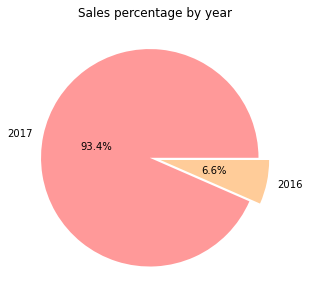

# --------------------------------------------------


In [17]:
print("EXPLORATORY DATA ANALYSIS: \n")

#%%
print("Plotting Year wise number of sales")
years = df['Year'].value_counts()
print(years)
pie, ax = plt.subplots(figsize=[7,5])
labels = ['2017', '2016']
colors = ['#ff9999', '#ffcc99']
plt.pie(x = years, autopct='%.1f%%', explode=[0.05]*2, labels=labels, pctdistance=0.5, colors = colors)
plt.title('Sales percentage by year')
print("Plotting pie chart")
plt.show()
print('#',50*"-")

Plotting monthly sales by year


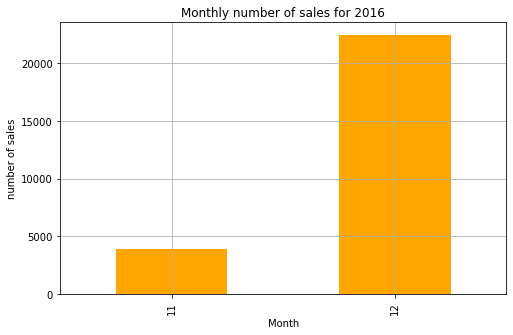

In [18]:
#%%
print("Plotting monthly sales by year")
sales_16 = df[df['Year'] == 2016]
sales_17 = df[df['Year'] == 2017]
monthly_16 = sales_16['Month'].value_counts()
monthly_17 = sales_17['Month'].value_counts()

plt.figure(figsize=(8,5))
monthly_16.sort_index().plot(kind='bar', color='orange')
plt.title('Monthly number of sales for 2016')
plt.xlabel('Month')
plt.ylabel('number of sales')
plt.grid()
plt.show()

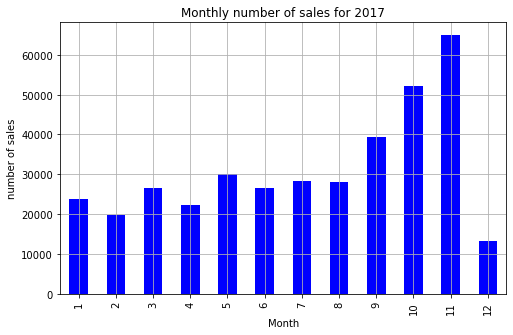

# --------------------------------------------------


In [19]:
plt.figure(figsize=(8,5))
monthly_17.sort_index().plot(kind='bar', color='blue')
plt.title('Monthly number of sales for 2017')
plt.xlabel('Month')
plt.ylabel('number of sales')
plt.grid()
plt.show()
print('#',50*"-")

Plotting top 10 customers after summing their purchase quantities


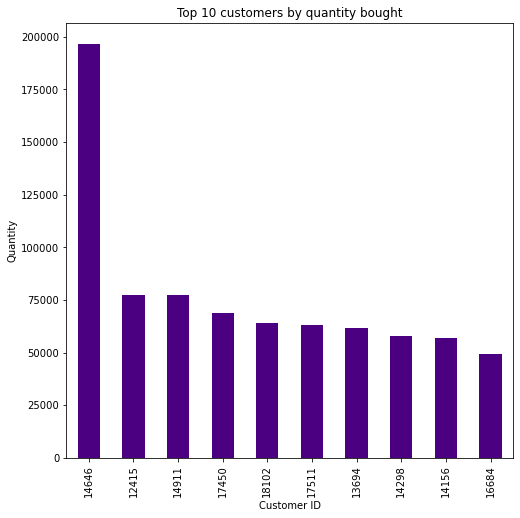

# --------------------------------------------------


In [20]:
#%%
customers = df.groupby('CustomerID')['Quantity'].sum()

print("Plotting top 10 customers after summing their purchase quantities")
top_customers = customers.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,8))
top_customers.plot(kind='bar', color='indigo')
plt.title('Top 10 customers by quantity bought')
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.show()
print('#',50*"-")

Country wise number of sales:
United Kingdom    356616
Germany             9477
France              8475
EIRE                7475
Spain               2528
Name: Country, dtype: int64
Plotting country wise sales


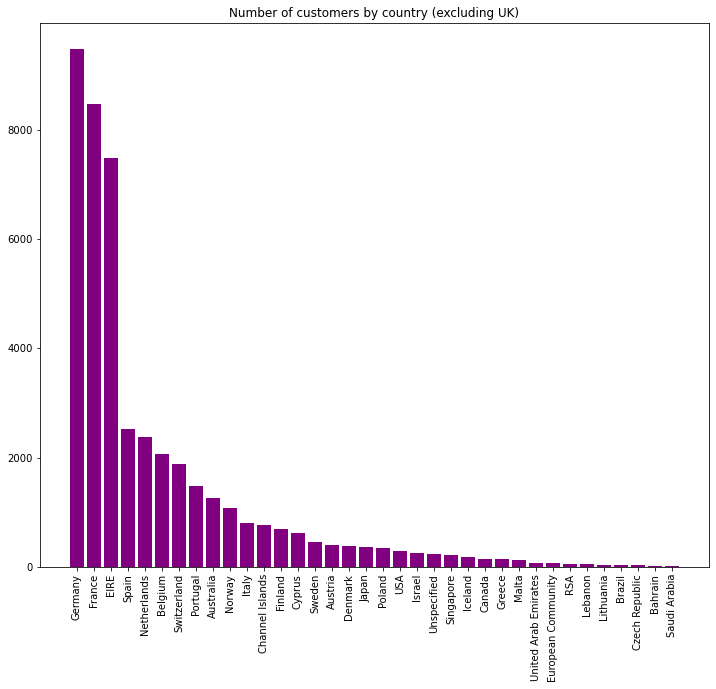

# --------------------------------------------------


In [21]:
#%%
print("Country wise number of sales:")
print(df['Country'].value_counts().head())

#%%
countries = df['Country'].value_counts()[1:]
fig, ax = plt.subplots(figsize = (12,10))

ax.bar(countries.index, countries, color= 'purple')
ax.set_xticklabels(countries.index, rotation = 90)
ax.set_title('Number of customers by country (excluding UK)')
print("Plotting country wise sales")
plt.show()
print('#',50*"-")

PLotting monthly TotalExpense distribution


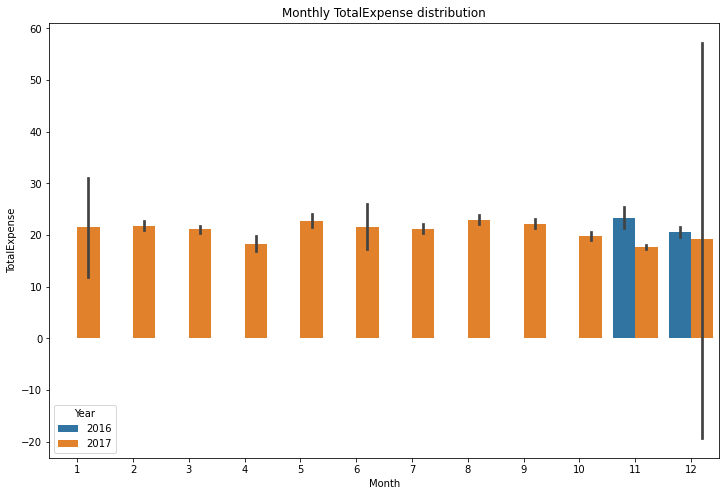

# --------------------------------------------------


In [22]:
#%%
print("PLotting monthly TotalExpense distribution")
plt.figure(figsize=(12, 8))
sns.barplot('Month', 'TotalExpense', data=df, hue='Year')
plt.title("Monthly TotalExpense distribution")
plt.show()
print('#',50*"-")

In [23]:
#%%
print("Calculating TotalExpense for each CustomerID")
customer_stat = df.groupby(['CustomerID'])['TotalExpense'].agg([np.sum, np.mean, np.max, np.min])
df1 = pd.DataFrame(customer_stat)
df1.columns = ['Total Expenditure', 'MeanAmt', 'MaxAmt', 'MinAmt']
print(df1.head(5))
print('#',50*"-")

Calculating TotalExpense for each CustomerID
            Total Expenditure    MeanAmt   MaxAmt    MinAmt
CustomerID                                                 
12346                    0.00   0.000000  77183.6 -77183.60
12347                 4310.00  23.681319    249.6      5.04
12348                 1797.24  57.975484    240.0     13.20
12349                 1757.55  24.076027    300.0      6.64
12350                  334.40  19.670588     40.0      8.50
# --------------------------------------------------


In [24]:
#%%
print("Calculating number of invoices for each CustomerID")
transactions = df[['InvoiceNo', 'CustomerID']]
transactions = transactions.drop_duplicates()
transactions = transactions.groupby(by='CustomerID', as_index=False).count()
transactions = transactions.rename(columns={'InvoiceNo': 'Total Purchases'})
print(transactions.head(5))
print('#',50*"-")

Calculating number of invoices for each CustomerID
   CustomerID  Total Purchases
0       12346                2
1       12347                7
2       12348                4
3       12349                1
4       12350                1
# --------------------------------------------------


In [25]:

#%%
print("Calculating number of unique items purchased by each customer")
unique_items = df[['StockCode', 'CustomerID']]
unique_items = unique_items.drop_duplicates()
unique_items = unique_items.groupby(by='CustomerID', as_index=False).count()
unique_items = unique_items.rename(columns={'StockCode': 'No. of unique items'})
print(unique_items.head(5))
print('#',50*"-")

Calculating number of unique items purchased by each customer
   CustomerID  No. of unique items
0       12346                    1
1       12347                  103
2       12348                   22
3       12349                   73
4       12350                   17
# --------------------------------------------------


In [26]:
print("CLUSTERING:\n")

print("We identified the metrics to use for clustering as follows: For each customer ID, we calculated TotalExpense, "
      "number of purchases, average amount per purchase, number of unique items bought. With the help of these metrics"
      "we will be able to categorize the customers into groups: High spending customers, regular (loyal) customers, etc. \n")

cluster_df1 = df1[['Total Expenditure']].merge(transactions, how='left', on='CustomerID')
cluster_df1['Avg. value per purchase'] = cluster_df1['Total Expenditure']/cluster_df1['Total Purchases']
cluster_df1 = cluster_df1.merge(unique_items, how='left', on='CustomerID')

print(cluster_df1.head())

CLUSTERING:

We identified the metrics to use for clustering as follows: For each customer ID, we calculated TotalExpense, number of purchases, average amount per purchase, number of unique items bought. With the help of these metricswe will be able to categorize the customers into groups: High spending customers, regular (loyal) customers, etc. 

   CustomerID  Total Expenditure  Total Purchases  Avg. value per purchase  \
0       12346               0.00                2                 0.000000   
1       12347            4310.00                7               615.714286   
2       12348            1797.24                4               449.310000   
3       12349            1757.55                1              1757.550000   
4       12350             334.40                1               334.400000   

   No. of unique items  
0                    1  
1                  103  
2                   22  
3                   73  
4                   17  


Plotting SSE against various values of k


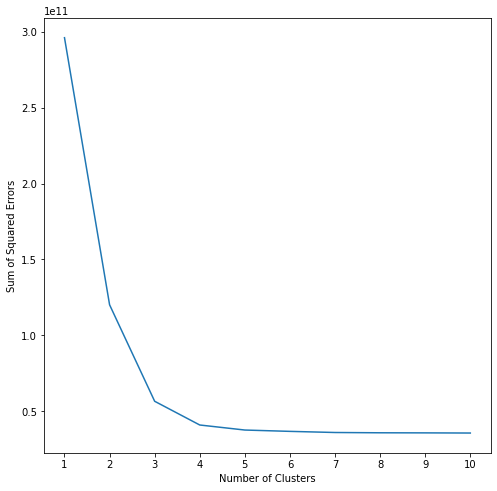

In [27]:
X = cluster_df1[['Total Expenditure', 'Total Purchases', 'Avg. value per purchase','No. of unique items']]
ar= ['Total Expenditure', 'Total Purchases', 'Avg. value per purchase','No. of unique items']

print("Plotting SSE against various values of k")
sum_sqEr = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init='random', n_init=10, max_iter=10)
    kmeans.fit(X)
    sum_sqEr.append(kmeans.inertia_)

f, axes = plt.subplots(1,1,figsize=(8,8))
plt.plot(range(1, 11), sum_sqEr)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

In [28]:
print("Using Elbow method, we can decide k = 4 as an appropriate number of clusters.")

kmeans = KMeans(n_clusters=4, random_state=42, init='random', n_init=10, max_iter=10)
kmeans.fit(X)
cluster_df1['Cluster']=kmeans.predict(X)

Using Elbow method, we can decide k = 4 as an appropriate number of clusters.


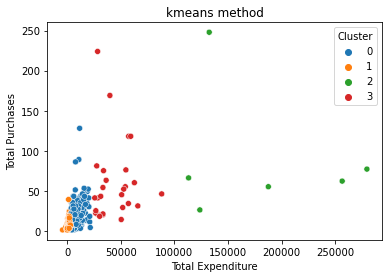

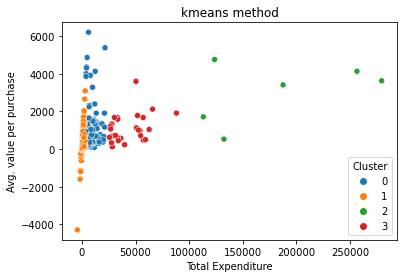

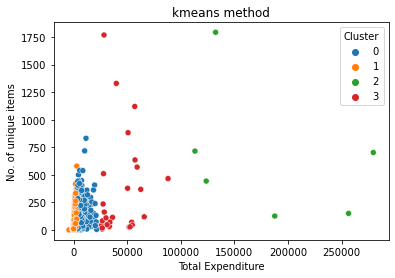

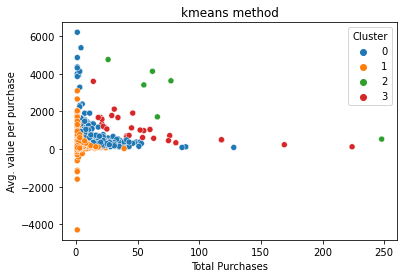

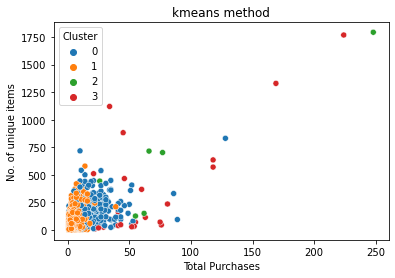

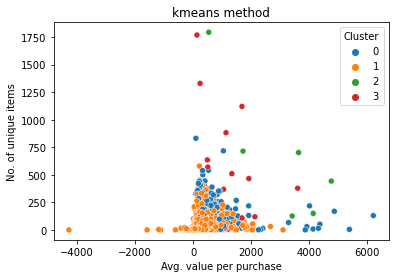

From the scatter plots showing different clusters, we can conclude a few things and assign some characteristics to the clusters, 

Cluster 0: Total expenditure is the least of all, total purchases are minimal and minimal number of unique items are bought by them.
Cluster 1: Highest expenditure is observed with a wide range of values. Total purchases are moderate. These customers have bought large number of unique items.
Cluster 2: Total expenditure is the same as cluster 0 and everything else is at a minimal level.
Cluster 3: Total expenditure is minimal but everything else is moderate in numbers. 



In [29]:
for i in range(3):
    for j in range(i+1,4):
        sns.scatterplot(x=ar[i], y=ar[j], hue='Cluster', data=cluster_df1, palette='tab10')
        plt.title('kmeans method')
        plt.show()

print("From the scatter plots showing different clusters, we can conclude a few things and assign some characteristics to the clusters, \n")
print("Cluster 0: Total expenditure is the least of all, total purchases are minimal and minimal number of unique items are bought by them.")
print("Cluster 1: Highest expenditure is observed with a wide range of values. Total purchases are moderate. These customers have bought large number of unique items.")
print("Cluster 2: Total expenditure is the same as cluster 0 and everything else is at a minimal level.")
print("Cluster 3: Total expenditure is minimal but everything else is moderate in numbers. \n")




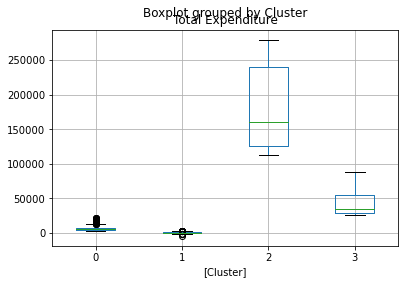

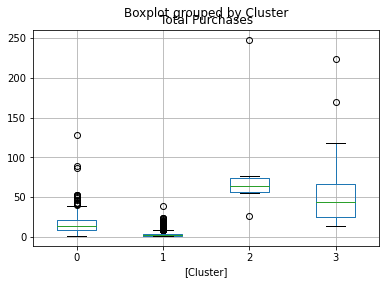

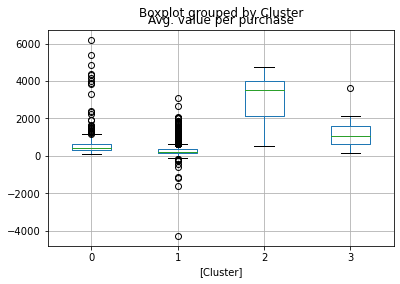

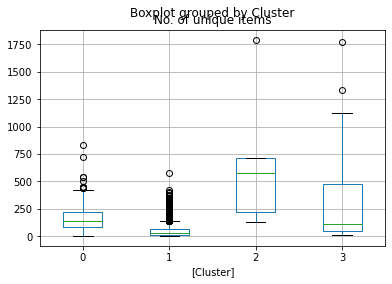

We plotted boxplots to confirm our observations from the scatter plots. 

Based on these observations we can categorize these clusters as follows: 

Cluster 0 and 2 need to be focussed more on, in terms of discounts and other offers in order to increase their purchase numbers.
Cluster 1 can be considered as high-value customers for whom a loyalty program should be rolled out. These customers are loyal as well seeing the number of purchases.
Cluster 3 consists of regular value but loyal customers who visit the store pretty often.


In [30]:
for i in range(4):
      cluster_df1.boxplot(column=ar[i], by=["Cluster"])
      plt.show()

print("We plotted boxplots to confirm our observations from the scatter plots. \n")
print("Based on these observations we can categorize these clusters as follows: \n")
print("Cluster 0 and 2 need to be focussed more on, in terms of discounts and other offers in order to increase their purchase numbers.")
print("Cluster 1 can be considered as high-value customers for whom a loyalty program should be rolled out. These customers are loyal as well seeing the number of purchases.")
print("Cluster 3 consists of regular value but loyal customers who visit the store pretty often.")




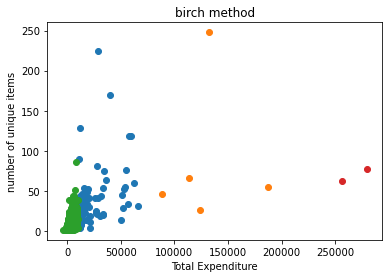

Final Output None


In [31]:
# birch clustering
from numpy import unique
from numpy import where
from sklearn.cluster import Birch


# define the model
birch1 = Birch(threshold=0.05, n_clusters=4)
# fit the model
birch1.fit(X)
# assign a cluster to each example
yhat = birch1.predict(X)
# retrieve unique clusters
clusters = unique(yhat)

x22 = []

for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    x22.append(row_ix)

for cluster in clusters:
    plt.scatter(X.iloc[x22[cluster][0], 0], X.iloc[x22[cluster][0], 1])
# show the plot
plt.title('birch method')
plt.xlabel('Total Expenditure')
plt.ylabel('number of unique items')
print('Final Output', plt.show())



In [32]:
from sklearn.cluster import MiniBatchKMeans

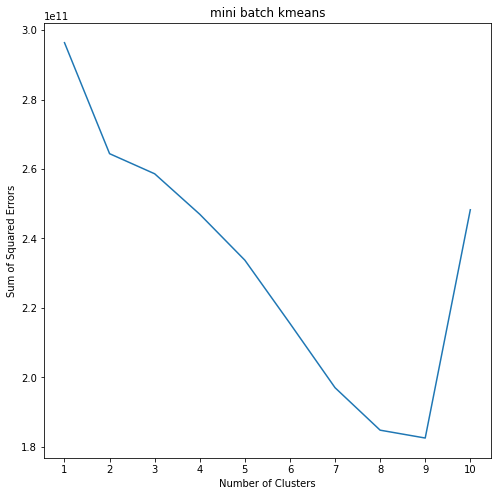

In [42]:
sum_sqEr = []
for k in range(1, 11):
    minikmeans = MiniBatchKMeans(n_clusters=k, random_state=0, batch_size=6, max_iter=10)
    minikmeans.fit(X)
    sum_sqEr.append(minikmeans.inertia_)

f, axes = plt.subplots(1,1,figsize=(8,8))
plt.plot(range(1, 11), sum_sqEr)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.title('mini batch kmeans')
plt.show()

In [40]:
minikmeans = MiniBatchKMeans(n_clusters=8, random_state=0, batch_size=6, max_iter=10).fit(X)
cluster_df1['Cluster1'] = minikmeans.predict(X)

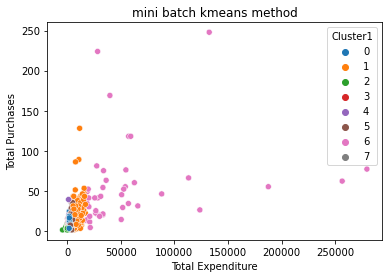

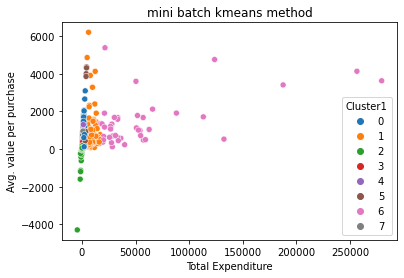

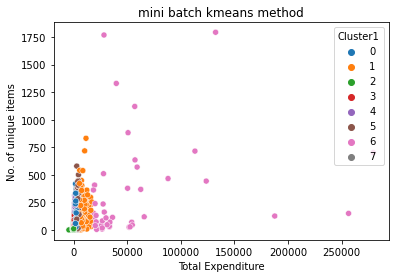

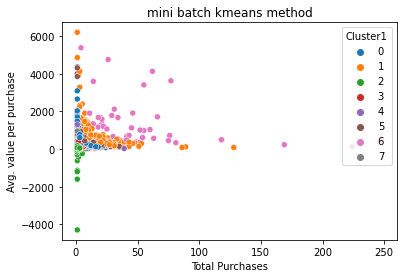

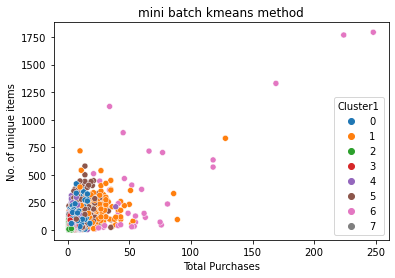

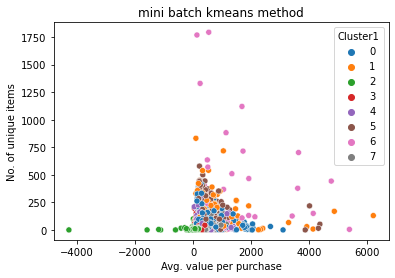

In [43]:
for i in range(3):
    for j in range(i+1,4):
        sns.scatterplot(x=ar[i], y=ar[j], hue='Cluster1', data=cluster_df1, palette='tab10')
        plt.title('mini batch kmeans method')
        plt.show()